In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## cleaning data

In [2]:
azure_ads = pd.read_csv("/Users/wu/Desktop/Internship/azure_ads/azure_ads.csv")

In [3]:
print(azure_ads)

         Unnamed: 0     user  time_stamp  adgroup_id          pid  nonclk  clk
0                 0   581738  1494137644           1  430548_1007       1    0
1                 1   449818  1494638778           3  430548_1007       1    0
2                 2   914836  1494650879           4  430548_1007       1    0
3                 3   914836  1494651029           5  430548_1007       1    0
4                 4   399907  1494302958           8  430548_1007       1    0
...             ...      ...         ...         ...          ...     ...  ...
1048570     1048570   909675  1494666964      183390  430548_1007       1    0
1048571     1048571   708716  1494582327      183390  430548_1007       1    0
1048572     1048572   576466  1494313024      183390  430548_1007       1    0
1048573     1048573  1037392  1494680974      183390  430548_1007       1    0
1048574     1048574   695789  1494572481      183390  430548_1007       1    0

[1048575 rows x 7 columns]


In [4]:
data = azure_ads.sample(n=1000000)

In [5]:
print(data)

        Unnamed: 0     user  time_stamp  adgroup_id          pid  nonclk  clk
478846      478846   849986  1494025937      101746  430548_1007       0    1
142625      142625   142670  1494208772       36822  430539_1007       1    0
257311      257311   141474  1494042146       58676  430539_1007       1    0
108383      108383  1017614  1494212109       29110  430548_1007       1    0
343655      343655   845622  1494251423       76946  430548_1007       0    1
...            ...      ...         ...         ...          ...     ...  ...
719882      719882   229740  1494327050      133687  430548_1007       1    0
301972      301972   900928  1494131545       67965  430539_1007       1    0
632715      632715  1012119  1494630040      122592  430548_1007       1    0
250007      250007    48733  1494079917       57455  430539_1007       1    0
831037      831037   643226  1494390784      151189  430548_1007       0    1

[1000000 rows x 7 columns]


In [6]:
data.dropna(axis=0)

,Unnamed: 0,user,time_stamp,adgroup_id,pid,nonclk,clk
478846,478846,849986,1494025937,101746,430548_1007,0,1
142625,142625,142670,1494208772,36822,430539_1007,1,0
257311,257311,141474,1494042146,58676,430539_1007,1,0
108383,108383,1017614,1494212109,29110,430548_1007,1,0
343655,343655,845622,1494251423,76946,430548_1007,0,1
...,...,...,...,...,...,...,...
719882,719882,229740,1494327050,133687,430548_1007,1,0
301972,301972,900928,1494131545,67965,430539_1007,1,0
632715,632715,1012119,1494630040,122592,430548_1007,1,0
250007,250007,48733,1494079917,57455,430539_1007,1,0


In [7]:
data.drop_duplicates()

,Unnamed: 0,user,time_stamp,adgroup_id,pid,nonclk,clk
478846,478846,849986,1494025937,101746,430548_1007,0,1
142625,142625,142670,1494208772,36822,430539_1007,1,0
257311,257311,141474,1494042146,58676,430539_1007,1,0
108383,108383,1017614,1494212109,29110,430548_1007,1,0
343655,343655,845622,1494251423,76946,430548_1007,0,1
...,...,...,...,...,...,...,...
719882,719882,229740,1494327050,133687,430548_1007,1,0
301972,301972,900928,1494131545,67965,430539_1007,1,0
632715,632715,1012119,1494630040,122592,430548_1007,1,0
250007,250007,48733,1494079917,57455,430539_1007,1,0


## Analysis By Pid

In [8]:
group = data.groupby('pid').sum()

In [9]:
print(group)

               Unnamed: 0          user       time_stamp   adgroup_id  nonclk  \
pid                                                                             
430539_1007  195318953699  219226781863  548121464649317  37890397826  348290   
430548_1007  328977729066  359183103730  946232981010313  64091232604  602212   

               clk  
pid                 
430539_1007  18505  
430548_1007  30993  


In [10]:
group['rate'] = (group['clk']) / ((group['clk']) + (group['nonclk']))

In [11]:
group = group.reset_index()

In [12]:
group

,pid,Unnamed: 0,user,time_stamp,adgroup_id,nonclk,clk,rate
0,430539_1007,195318953699,219226781863,548121464649317,37890397826,348290,18505,0.050451
1,430548_1007,328977729066,359183103730,946232981010313,64091232604,602212,30993,0.048946


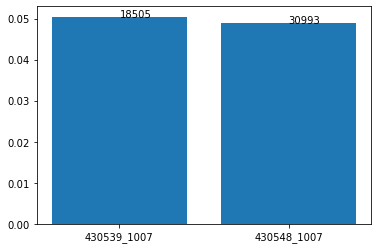

In [13]:
plt.bar(group['pid'],group['rate'])
for a in range(0,2) :
    plt.text(group['pid'][a],group['rate'][a],group['clk'][a])

Comparing this two pid, there is no significant difference.

## Analysis By Age & Gender

In [14]:
user_profile = pd.read_csv("/Users/wu/Desktop/Internship/azure_ads/user_profile.csv")

In [15]:
print(user_profile)

         Unnamed: 0  userid  gender  age_level  pvalue_level  occupation
0                 0     234       2          5           NaN           0
1                 1     523       2          2           1.0           1
2                 2     612       1          2           2.0           0
3                 3    1670       2          4           NaN           0
4                 4    2545       1          4           NaN           0
...             ...     ...     ...        ...           ...         ...
1048570     1048570  272699       2          4           2.0           0
1048571     1048571  273113       1          5           NaN           0
1048572     1048572  273589       2          4           NaN           0
1048573     1048573  273943       2          4           NaN           0
1048574     1048574  274358       2          5           NaN           0

[1048575 rows x 6 columns]


In [16]:
user_profile.rename(columns={'userid':'user'},inplace=True)

In [17]:
merge = pd.merge(data,user_profile, on = ["user"], how = "left")

In [18]:
print(merge)

        Unnamed: 0_x     user  time_stamp  adgroup_id          pid  nonclk  \
0             478846   849986  1494025937      101746  430548_1007       0   
1             142625   142670  1494208772       36822  430539_1007       1   
2             257311   141474  1494042146       58676  430539_1007       1   
3             108383  1017614  1494212109       29110  430548_1007       1   
4             343655   845622  1494251423       76946  430548_1007       0   
...              ...      ...         ...         ...          ...     ...   
999995        719882   229740  1494327050      133687  430548_1007       1   
999996        301972   900928  1494131545       67965  430539_1007       1   
999997        632715  1012119  1494630040      122592  430548_1007       1   
999998        250007    48733  1494079917       57455  430539_1007       1   
999999        831037   643226  1494390784      151189  430548_1007       0   

        clk  Unnamed: 0_y  gender  age_level  pvalue_level  occ

In [19]:
merge = merge.dropna(axis=0)

In [20]:
merge.drop_duplicates()

,Unnamed: 0_x,user,time_stamp,adgroup_id,pid,nonclk,clk,Unnamed: 0_y,gender,age_level,pvalue_level,occupation
0,478846,849986,1494025937,101746,430548_1007,0,1,743731.0,2.0,6.0,2.0,0.0
1,142625,142670,1494208772,36822,430539_1007,1,0,114733.0,2.0,3.0,2.0,0.0
3,108383,1017614,1494212109,29110,430548_1007,1,0,1036582.0,2.0,3.0,2.0,0.0
6,1023293,86606,1494088953,179498,430548_1007,0,1,1001068.0,2.0,4.0,1.0,0.0
14,796103,785778,1494575677,146422,430539_1007,0,1,579259.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999994,714016,276529,1494270270,133095,430539_1007,1,0,201432.0,2.0,4.0,2.0,0.0
999995,719882,229740,1494327050,133687,430548_1007,1,0,639436.0,1.0,3.0,2.0,0.0
999996,301972,900928,1494131545,67965,430539_1007,1,0,433676.0,2.0,4.0,3.0,0.0
999997,632715,1012119,1494630040,122592,430548_1007,1,0,905561.0,1.0,4.0,1.0,0.0


In [21]:
age = merge.groupby(['age_level','gender']).sum()

In [22]:
age['rate'] = (age['clk'] / ((age['clk']) + (age['nonclk'])))

In [23]:
age = age.reset_index()

In [45]:
gender1 = []
for i in range(0,14):
    if age.loc[i]['gender'] == 1 :
        gender1.append(age['rate'][i])


In [46]:
gender2 =[]
for i in range(0,14) :
    if age.loc[i]['gender'] == 2 :
        gender2.append(age['rate'][i])

In [47]:
num1 =[]
for i in range(0,14):
    if age.loc[i]['gender'] == 1 :
        num1.append(age['clk'][i])

In [48]:
num2 = []
for i in range(0,14):
    if age.loc[i]['gender'] == 2 :
        num2.append(age['clk'][i])


In [49]:
num2

[2, 432, 2200, 4289, 3618, 2740, 322]

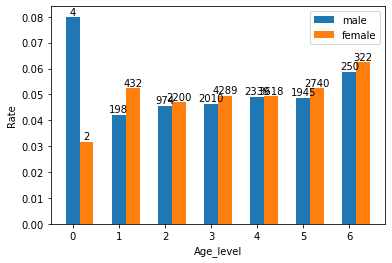

In [50]:
x = np.arange(7)
bar_width = 0.3

plt.bar(x, gender1, bar_width,label = 'male')
plt.bar(x+bar_width, gender2, bar_width, align="center",label='female')

plt.legend()

i = 0
j = 0
for a,b in zip(x,gender1):
    plt.text(a,b,num1[i],ha="center",va= "bottom")
    i += 1

for a,b in zip(x+0.3,gender2):
    plt.text(a,b,num2[j],ha="center",va= "bottom")
    j += 1

plt.xlabel("Age_level")
plt.ylabel("Rate")
plt.show()

Based on the plot, we can conclude that the rate of male in age_level = 0 has the highest rate while the female in this age level has the lowest in this data set. As for the other groups, there was no significant difference in the data. We can appropriately increase the ad placement for men in age_level 0 and decrease the placement for women in age_level 0.

In [ ]:
merge['time_stamp'] = pd.to_datetime(merge['time_stamp'],unit='s')

In [ ]:
df = merge

In [ ]:
df['day'] = merge['time_stamp'].dt.day

In [ ]:
df['hour'] = merge['time_stamp'].dt.hour

In [ ]:
time = df.groupby(['day','hour']).sum()

In [25]:
time['rate'] = (time['clk'] / ((time['clk']) + (time['nonclk'])))

SyntaxError: cannot assign to literal (<unknown>, line 1)

In [26]:
time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


In [27]:
time = time.reset_index()

NameError: name 'time' is not defined

In [28]:
day5 = []
hour5 = []
num5 = []
for i in range(0,192):
    if time.loc[i]['day'] == 5 :
        day5.append(time['rate'][i])
        hour5.append(time['hour'][i])
        num5.append(time['clk'][i])

NameError: name 'time' is not defined

In [29]:
day6 = []
hour6 = []
num6 = []
for i in range(0,192):
    if time.loc[i]['day'] == 6 :
        day6.append(time['rate'][i])
        hour6.append(time['hour'][i])
        num6.append(time['clk'][i])

NameError: name 'time' is not defined

In [30]:
day7 = []
hour7 = []
num7 = []
for i in range(0,192):
    if time.loc[i]['day'] == 7 :
        day7.append(time['rate'][i]) 
        hour7.append(time['hour'][i])
        num7.append(time['clk'][i])

NameError: name 'time' is not defined

In [31]:
day8 = []
hour8 = []
num8 = []
for i in range(0,192):
    if time.loc[i]['day'] == 8 :
        day8.append(time['rate'][i])
        hour8.append(time['hour'][i])
        num8.append(time['clk'][i])

NameError: name 'time' is not defined

In [32]:
day9 = []
hour9 = []
num9 = []
for i in range(0,192):
    if time.loc[i]['day'] == 9 :
        day9.append(time['rate'][i])
        hour9.append(time['hour'][i])
        num9.append(time['clk'][i])

NameError: name 'time' is not defined

In [33]:
day10 = []
hour10 = []
num10 = []
for i in range(0,192):
    if time.loc[i]['day'] == 10 :
        day10.append(time['rate'][i])
        hour10.append(time['hour'][i])
        num10.append(time['clk'][i])

NameError: name 'time' is not defined

In [34]:
day11 = []
hour11 = []
num11 = []
for i in range(0,192):
    if time.loc[i]['day'] == 11 :
        day11.append(time['rate'][i])
        hour11.append(time['hour'][i])
        num11.append(time['clk'][i])

NameError: name 'time' is not defined

In [35]:
day12 = []
hour12 = []
num12 = []
for i in range(0,192):
    if time.loc[i]['day'] == 12 :
        day12.append(time['rate'][i])
        hour12.append(time['hour'][i])
        num12.append(time['clk'][i])

NameError: name 'time' is not defined

In [36]:
day13 = []
hour13 = []
num13 = []
for i in range(0,192):
    if time.loc[i]['day'] == 13 :
        day13.append(time['rate'][i])
        hour13.append(time['hour'][i])
        num13.append(time['clk'][i])

NameError: name 'time' is not defined

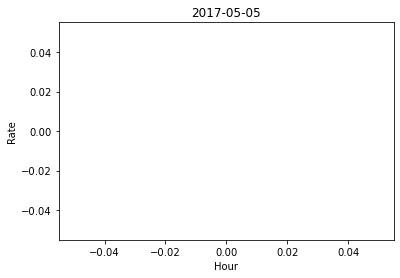

In [37]:
plt.bar(hour5,day5)
for i in range(0,len(num5)):
    plt.text(hour5[i],day5[i],num5[i])
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-05")
plt.show()

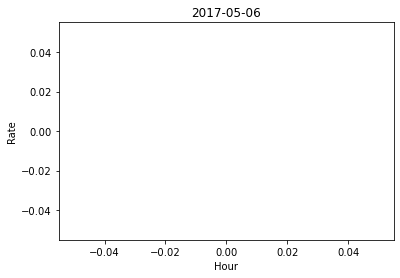

In [38]:
plt.bar(hour6,day6)
for i in range(0,len(num6)):
    plt.text(hour6[i],day6[i],num6[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-06")
plt.show()

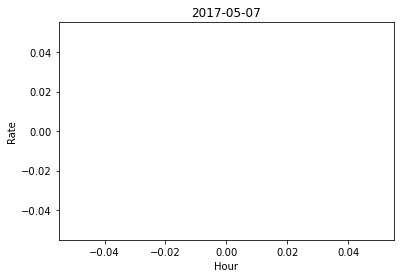

In [39]:
plt.bar(hour7,day7)
for i in range(0,len(num7)):
    plt.text(hour7[i],day7[i],num7[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-07")
plt.show()

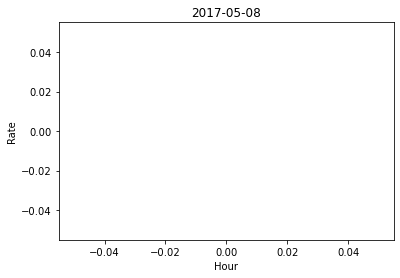

In [40]:
plt.bar(hour8,day8)
for i in range(0,len(num8)):
    plt.text(hour8[i],day8[i],num8[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-08")
plt.show()

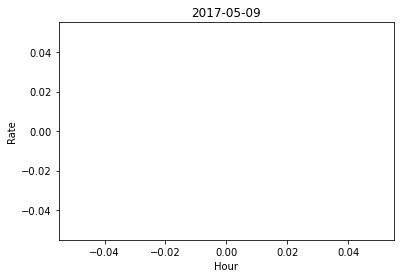

In [41]:
plt.bar(hour9,day9)
for i in range(0,len(num9)):
    plt.text(hour9[i],day9[i],num9[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-09")
plt.show()

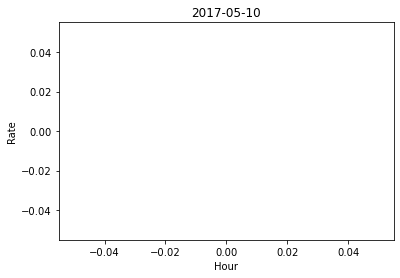

In [42]:
plt.bar(hour10,day10)
for i in range(0,len(num10)):
    plt.text(hour10[i],day10[i],num10[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-10")
plt.show()

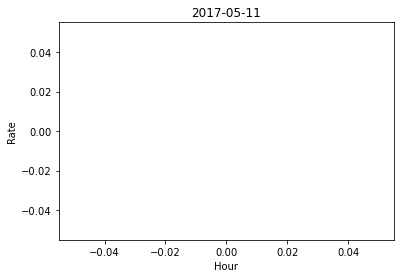

In [43]:
plt.bar(hour11,day11)
for i in range(0,len(num11)):
    plt.text(hour11[i],day11[i],num11[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-11")
plt.show()

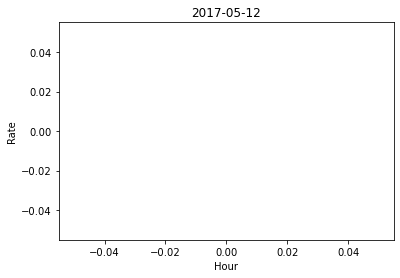

In [44]:
plt.bar(hour12,day12)
for i in range(0,len(num12)):
    plt.text(hour12[i],day12[i],num12[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-12")
plt.show()

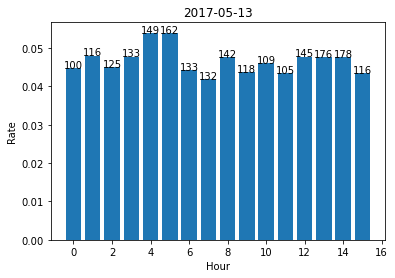

In [544]:
plt.bar(hour13,day13)
for i in range(0,len(num13):
    plt.text(hour13[i],day13[i],num13[i],ha='center')
    
plt.xlabel("Hour")
plt.ylabel("Rate")
plt.title("2017-05-13")
plt.show()

In [545]:
hour = merge

In [549]:
hour['hour'] = hour['time_stamp'].dt.hour

In [550]:
hour = hour.groupby('hour').sum()

In [552]:
hour = hour.reset_index()

In [555]:
hour['rate'] = (hour['clk'] / ((hour['clk']) + (hour['nonclk'])))

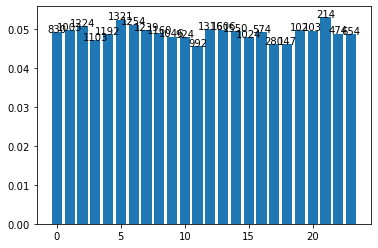

In [557]:
plt.bar(hour['hour'],hour['rate'])
for i in range(0,24):
    plt.text(hour['hour'][i],hour['rate'][i],hour['clk'][i],ha='center')